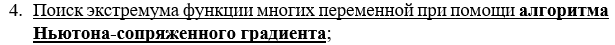

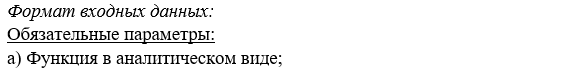

In [181]:
def inputSopr():
    
    """
    Функция для ввода данных, с помощью которого будет осуществляться алгоритм Ньютон-сопряженного градиента
    
    Parameters
    ----------
    params: str
        Строка на вход с переменными, которые могуи быть заданы любой русской или английской буквой
    F: str
        Функция в аналитическом виде в формате строки
        
    Returns
    -----------

    Final: dictionary
        Словарь со всеми переменными и функциями, которые ранее были введены
    
    """
   
    params = input('Введите названия переменных: ')
    params = params.split(' ')
    F = input('Функция в аналитическом виде :  ')
    
    Final = {}
    for i in range(1, len(params)+1):
        Final[f'p{i}'] = params[i-1]
    Final['func'] = F

    return Final

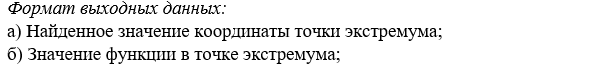

In [182]:
from sympy import *
def sopr(dictionary):
    
    """
    
    Функция, которая осуществляет алгоритм алгоритм Ньютон-сопряженного градиента
    
    Parameters
    ----------
    dictionary: dict
        Словарь, со всеми переменными, которые были заданы в функции ввода
    eps: float
        критерий остановки

    func: str
        Функция в аналитическом виде в формате строки
    
    Returns
    ---------
    X: list
        Найденная точка минимума
    fun: float
        Значение функции в точке экстремума
    (time.time() - start_time): float
        Время выполнения в секундах
    
    """
    
    # преобразование данных для символьного вычислнения
    import numpy as np
    import time
    from sympy.parsing.sympy_parser import parse_expr
    
   
    data = dictionary
    func = data['func']
    func = parse_expr(func)
    t=Symbol('t')
    eps=0.1
    p=[]
    syms=[]
    for i in range(len(data)-1):
        p.append(data[list(data.keys())[i]])
        syms.append(Symbol(p[i]))

        
    # реализация метода
    start_time = time.time()
    
    
    grad = []          # вектор градиентов символьно
    X = [0]*len(p)     # вектор начальной точки (по умолчанию 0)
    Y = []             # значение градиента в начальной точке
    spis = []          # список кортежей для применения subs в дальнейшем
    fun = 0
    
    for i in range(len(p)):
        grad.append(func.diff(syms[i]))
    
    for i in range(len(p)):
        spis.append((p[i], X[i]))
    
    for i in range(len(grad)):
        Y.append(grad[i].subs(spis))
        
    fun = func.subs(spis) # значение функции в точке
    
    while True:
        if abs(sum((Y[i])**2 for i in range(len(Y))))>eps: # 2 ШАГ - критерий остановки
            # fun = func.subs(spis) # значение функции в точке
            # X1 = []
            for i in range(len(X)):
                X[i] = (X[i] - t*Y[i]) # 4 ШАГ - делаем шаг вдоль направления антиградиента
                spis[i] = ((p[i], X[i]))
            tfunc = func.subs(spis) # 5 ШАГ - подставляем в начальную функцию
            tfunc_ = tfunc.diff(t)
            t1 = solve(tfunc_, t)[0] # 6 ШАГ - находим t
            for i in range(len(X)):
                X[i] = X[i].subs(t, t1) # 7 ШАГ - получаем новую точку
                spis[i] = ((p[i], X[i]))

            for i in range(len(grad)):
                Y[i] = grad[i].subs(spis) # новое значение градиента в новой точке
            fun = func.subs(spis) # значение функции в точке
            
        else:
            break
            
    print(f'Найденное значение координаты экстремума: {X}')
    print(f'Значение функции в точке экстремума: {fun}')
    print("Время выполнения( в секундах ) = %s  " % (time.time() - start_time))

In [184]:
sopr(inputSopr()) # 2*x**2+2*y**2+2*x*y+20*x+10*y+10 - ПРОХОДИТ

Введите названия переменных: x y
Функция в аналитическом виде :  2*x**2+2*y**2+2*x*y+20*x+10*y+10
Найденное значение координаты экстремума: [-3875/784, 0]
Значение функции в точке экстремума: -12291095/307328
Время выполнения( в секундах ) = 0.0  


In [183]:
sopr(inputSopr()) # 10*x**2+3*y**2+2*x*y-6 - ПРОХОДИТ

Введите названия переменных: x y
Функция в аналитическом виде :  10*x**2+3*y**2+2*x*y-6
Найденное значение координаты экстремума: [0, 0]
Значение функции в точке экстремума: -6
Время выполнения( в секундах ) = 0.0019953250885009766  


In [185]:
sopr(inputSopr()) # x**3+2*y**2-3*x-4*y - не сокращается

Введите названия переменных: x y
Функция в аналитическом виде :  x**3+2*y**2-3*x-4*y
Найденное значение координаты экстремума: [-32/27 - (-3 + 3*(-32/27 + sqrt(3049)/27)**2)*(-753/896 - 3*sqrt(3049)/224 + 39716897*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/629974412928 + 179827*sqrt(3049)*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/157493603232) + sqrt(3049)/27, -128/81 - (-836/81 + 16*sqrt(3049)/81)*(-753/896 - 3*sqrt(3049)/224 + 39716897*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/629974412928 + 179827*sqrt(3049)*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/157493603232) + 4*sqrt(3049)/81]
Значение функции в точке экстремума: -25*sqrt(3049)/81 + 3*(-3 + 3*(-32/27 + sqrt(3049)/27)**2)*(-753/896 - 3*sqrt(3049)/224 + 39716897*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/629974412928 + 179827*sqrt(3049)*sqrt(-583198291448711 + 10561793666560*sqrt(3049))/157493603232) + 4*(-836/81 + 16*sqrt(3049)/81)*(-753/896 - 3*sqrt(3049)/224 + 39716897*sqrt(-583198291

In [186]:
sopr(inputSopr()) # x**2+2*y**2+exp(x+y) - ПРОХОДИТ, только ответы через функцию Ламберта

Введите названия переменных: x y
Функция в аналитическом виде :  x**2+2*y**2+exp(x+y)
Найденное значение координаты экстремума: [-LambertW(2/3)/2, -LambertW(2/3)/2]
Значение функции в точке экстремума: 3*LambertW(2/3)**2/4 + exp(-LambertW(2/3))
Время выполнения( в секундах ) = 0.05316901206970215  


In [187]:
sopr(inputSopr()) # (x-2)**2+(x-3)**2 - ПРОХОДИТ

Введите названия переменных: x
Функция в аналитическом виде :  (x-2)**2+(x-3)**2
Найденное значение координаты экстремума: [5/2]
Значение функции в точке экстремума: 1/2
Время выполнения( в секундах ) = 0.0036635398864746094  


In [188]:
sopr(inputSopr()) # 4*x+cos(x)

Введите названия переменных: x
Функция в аналитическом виде :  4*x+cos(x)
Найденное значение координаты экстремума: [-pi - asin(4)]
Значение функции в точке экстремума: -4*pi - sqrt(15)*I - 4*asin(4)
Время выполнения( в секундах ) = 0.0660698413848877  


In [189]:
sopr(inputSopr())

Введите названия переменных: x
Функция в аналитическом виде :  ln(x**2)


IndexError: list index out of range

In [190]:
help(inputSopr)

Help on function inputSopr in module __main__:

inputSopr()
    Функция для ввода данных, с помощью которого будет осуществляться алгоритм Ньютон-сопряженного градиента
    
    Parameters
    ----------
    params: str
        Строка на вход с переменными, которые могуи быть заданы любой русской или английской буквой
    F: str
        Функция в аналитическом виде в формате строки
    Final: dictionary
        Словарь со всеми переменными и функциями, которые ранее были введены



In [191]:
help(sopr)

Help on function sopr in module __main__:

sopr(dictionary)
    Функция, которая осуществляет алгоритм алгоритм Ньютон-сопряженного градиента
    
    Parameters
    ----------
    dictionary: dict
        Словарь, со всеми переменными, которые были заданы в функции ввода
    eps: float
        критерий остановки
    
    func: str
        Функция в аналитическом виде в формате строки
    
    Returns
    ---------
    X: list
        Найденная точка минимума
    fun: float
        Значение функции в точке экстремума
    (time.time() - start_time): float
        Время выполнения в секундах

